In [1]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2
from enhancer import *
from enhancer.networks.imdn_rtc import SmallEnhancer
from enhancer.losses import WassFeatureLoss
from enhancer.options import *
opt_path = "../configs/smallmodel/mse_train.yml"




In [2]:
criterion = WassFeatureLoss()
model = SmallEnhancer(upscale=4).to(device)
dataloader = get_dataloader_from_yml(opt_path)
trainloader = dataloader["train_dataloader"]
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=0)

In [3]:
sample=getsample(trainloader)

In [4]:
def overfit_on_single_batch(batched_data, criterion, optimizer):
    model.train()
    mb = progress_bar(range(0, 1000))
    for e in mb:
        input_image = batched_data["lr"].to(device).float()
        target = batched_data["hr"].to(device).float()
        optimizer.zero_grad()
        outputs = model(input_image)
        loss_outputs = criterion(outputs, target)
        loss_outputs.backward()
        optimizer.step()
        print(f"Finished loop {e}    :     Loss :{loss_outputs.item()}")

In [ ]:
overfit_on_single_batch(sample,criterion,optimizer)

Finished loop 0    :     Loss :9.351049423217773
Finished loop 1    :     Loss :70.37728881835938
Finished loop 2    :     Loss :7.1308794021606445
Finished loop 3    :     Loss :9.497576713562012
Finished loop 4    :     Loss :9.001227378845215
Finished loop 5    :     Loss :7.391151428222656
Finished loop 6    :     Loss :8.639700889587402
Finished loop 7    :     Loss :8.899299621582031
Finished loop 8    :     Loss :7.859891891479492
Finished loop 9    :     Loss :7.233512878417969
Finished loop 10    :     Loss :6.958189964294434
Finished loop 11    :     Loss :6.554853916168213
Finished loop 12    :     Loss :6.685585021972656
Finished loop 13    :     Loss :5.770440578460693
Finished loop 14    :     Loss :5.259700298309326
Finished loop 15    :     Loss :4.683859348297119
Finished loop 16    :     Loss :4.471363544464111
Finished loop 17    :     Loss :4.588246822357178
Finished loop 18    :     Loss :4.162693023681641
Finished loop 19    :     Loss :3.9535915851593018
Finished

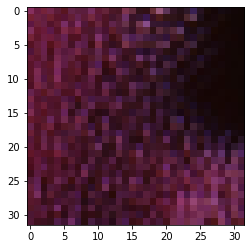

In [29]:
from enhancer.utils import *
plt.imshow(im_convert(sample["lr"][0],denormalize=False))

In [15]:
model.eval()
with torch.no_grad():
    ops= model(sample["lr"].to(device))

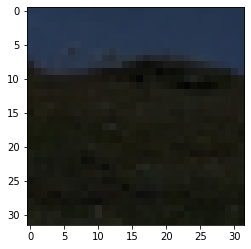

In [8]:
from enhancer.utils import *
plt.imshow(im_convert(sample["lr"][1],denormalize=False))

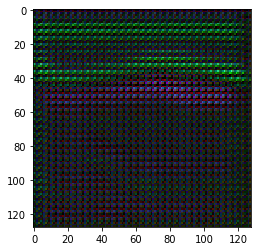

In [16]:
plt.imshow(im_convert(ops[1],denormalize=False))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


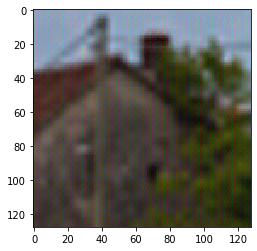

In [108]:
plt.imshow(im_convert(ops[3],denormalize=False))